# Streaming Platform Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of pridiction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

## Reading and Understanding the Data

In [3]:
#Importing dataset
media = pd.DataFrame(pd.read_csv("Datasets/mediacompany.csv"))
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
# Checking Duplicates
sum(media.duplicated(subset = 'Date')) == 0
# No duplicate values

True

In [5]:
# Dropping the unwanted column
media = media.drop('Unnamed: 7',axis = 1)

In [6]:
#Let's explore the top 5 rows
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


## Data Inspection

In [7]:
media.shape

(80, 7)

In [8]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [9]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


## Data Cleaning

In [10]:
# Checking Null values
media.isnull().sum()*100/media.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Date                   0.0
Views_show             0.0
Visitors               0.0
Views_platform         0.0
Ad_impression          0.0
Cricket_match_india    0.0
Character_A            0.0
dtype: float64

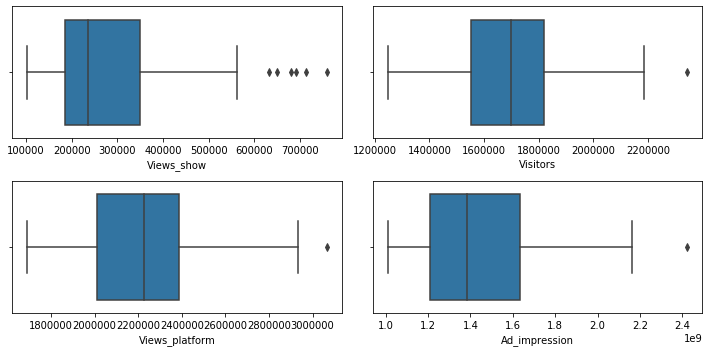

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(media['Views_show'], ax = axs[0,0])
plt2 = sns.boxplot(media['Visitors'], ax = axs[0,1])
plt3 = sns.boxplot(media['Views_platform'], ax = axs[1,0])
plt4 = sns.boxplot(media['Ad_impression'], ax = axs[1,1])

plt.tight_layout()

In [12]:
# Data preparation

In [13]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'], dayfirst = False )
# Date is in the format YYYY-MM-DD

In [14]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


#### Deriving Matrices

Let's derive day of week column from date 

In [18]:
media['Day_of_week'] = media['Date'].dt.dayofweek

In [19]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


## Exploratory Data Analysis

Target Variable
- Views Show

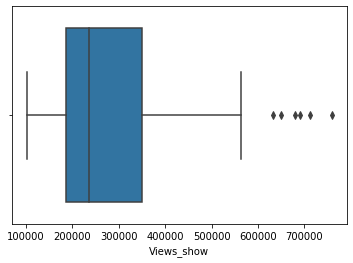

In [20]:
sns.boxplot(media['Views_show'])

### Univariate analysis

#### Date

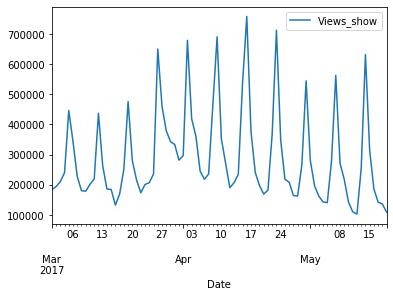

In [21]:
# days vs Views_show
media.plot.line(x='Date', y='Views_show')

Inference
- we can observe a pattern in the plot.

#### Day of week

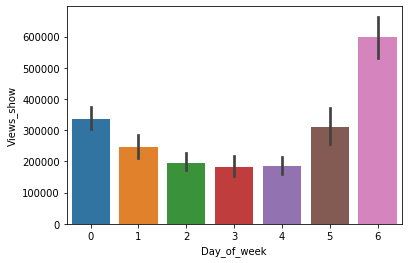

In [23]:
sns.barplot(data = media,x='Day_of_week', y='Views_show')

Inference
- we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.

Hence we can think of another matrix "Weekend" that is 1 for weekends and 0 for weekdays.

In [25]:
di = {5:1, 6:1, 0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['Day_of_week'].map(di)

In [26]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


#### Weekend

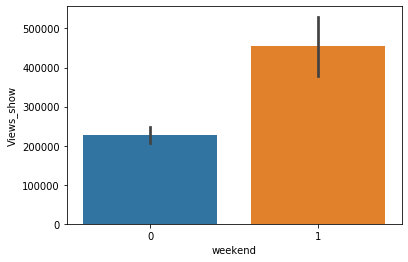

In [27]:
sns.barplot(data = media,x='weekend', y='Views_show')

viewership is higher on weekends.

#### Ad Impressions

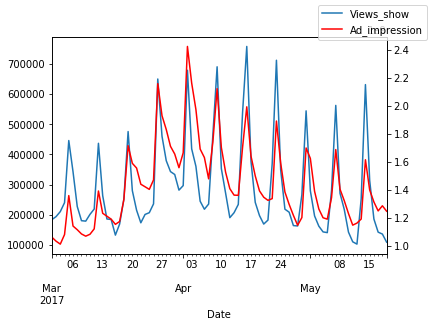

In [29]:
# plot for Date vs Views_show and days vs Ad_impressions
ax = media.plot(x="Date", y="Views_show", legend=False)
ax2 = ax.twinx()
media.plot(x="Date", y="Ad_impression", ax=ax2, legend=False, color="r")
ax.figure.legend()


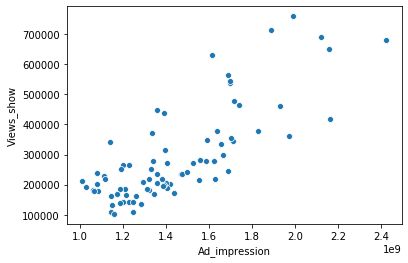

In [30]:
sns.scatterplot(data = media, x = 'Ad_impression', y = 'Views_show')

we can see that the views as well as ad impressions show a weekly pattern.

#### Visitors

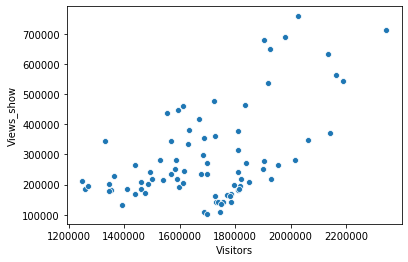

In [31]:
sns.scatterplot(data = media, x = 'Visitors', y = 'Views_show')

Inference: Show views are some what proportionately related to Visitors

#### Views Platform

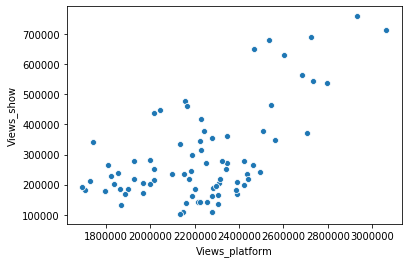

In [33]:
sns.scatterplot(data = media, x = 'Views_platform', y = 'Views_show')

Inference: Show views are some what proportionately related to Platform views

#### Cricket Match

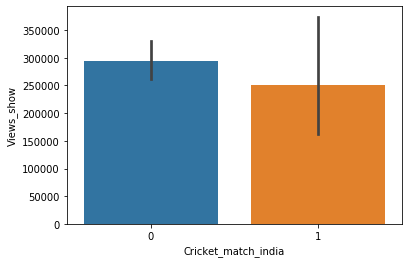

In [34]:
sns.barplot(data = media,x='Cricket_match_india', y='Views_show')

Inference: Show views slightly declines when there is a cricket match.

#### Character A

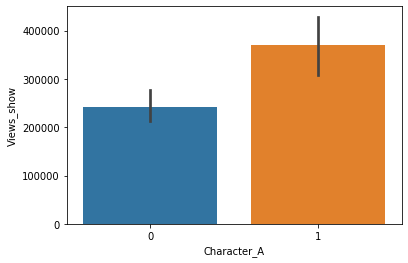

In [36]:
sns.barplot(data = media,x='Character_A', y='Views_show')

Inference: Presence of Character A improves the show viewership.

## Model building

#### Rescaling the Features

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Views_show','Visitors','Views_platform','Ad_impression']

media[num_vars] = scaler.fit_transform(media[num_vars])

In [41]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1


Let's check the correlation coefficients to see which variables are highly correlated

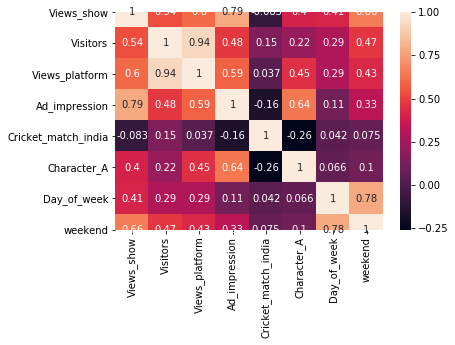

In [42]:
sns.heatmap(media.corr(),annot = True)

#### Running first model (lm1) Visitors, weekend

In [43]:
# Putting feature variable to X
X = media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

In [46]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           2.51e-12
Time:                        19:43:00   Log-Likelihood:                 30.210
No. Observations:                  80   AIC:                            -54.42
Df Residuals:                      77   BIC:                            -47.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0770      0.042      1.826      0.0

Inference:
- Visitors as well as weekend column are significant.

#### Running second model (lm2) visitors, weekend & Character_A

In [48]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = media['Views_show']

In [49]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        19:49:30   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      

###### we have seen that views of today effects views of tomorrow. So to take that in account we will create a Lag variable.

In [50]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend,Lag_Views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.009817
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631


In [51]:
media.Lag_Views[0] = 0

In [52]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend,Lag_Views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.000000
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631


#### Running third model (lm3) visitors, Character_A, Lag_views & weekend

In [53]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [54]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     54.94
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.48e-21
Time:                        20:48:35   Log-Likelihood:                 57.207
No. Observations:                  80   AIC:                            -104.4
Df Residuals:                      75   BIC:                            -92.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0149      0.032     -0.460      

Inference:
It leaves visitor insignificant.

#### Running fourth model (lm4) Character_A, weekend & Views_platform

In [55]:
# Putting feature variable to X
X = media[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = media['Views_show']

In [56]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           3.59e-15
Time:                        20:58:37   Log-Likelihood:                 39.264
No. Observations:                  80   AIC:                            -70.53
Df Residuals:                      76   BIC:                            -61.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0485      0.036      1.

#### Running fifth model (lm5) Character_A, weekend & Visitors

In [57]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = media['Views_show']

In [58]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        21:27:03   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      

#### Running sixth model (lm6) Character_A, weekend, Visitors & Ad_impressions

In [59]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [60]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.10e-25
Time:                        21:34:05   Log-Likelihood:                 67.431
No. Observations:                  80   AIC:                            -124.9
Df Residuals:                      75   BIC:                            -113.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0064      0.028     -0.229

#### Running seventh model (lm7) Character_A, weekend & Ad_impressions

Inference
- we can observe a pattern in the plot.

In [61]:
# Putting feature variable to X
X = media[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [62]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        21:36:40   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.021     -0.015

In [63]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

#### Running seventh model (lm8) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [64]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

In [65]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.02e-25
Time:                        21:37:24   Log-Likelihood:                 67.508
No. Observations:                  80   AIC:                            -125.0
Df Residuals:                      75   BIC:                            -113.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

#### Running seventh model (lm9) Character_A, weekend & ad_impressions_million

In [66]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

In [67]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        21:37:29   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

#### Making predictions using lm 9 

In [68]:
# Making predictions using the model
X = media[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_9.predict(X)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.01086608843364618
r_square_value : 0.802643446857565


Text(0, 0.5, 'Views')

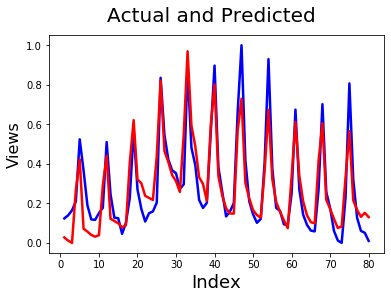

In [71]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

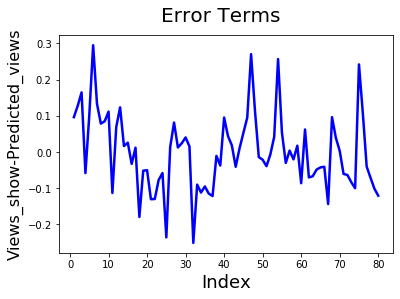

In [72]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

#### Making predictions using lm5

In [73]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_5.predict(X)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [75]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.022801047640331872
r_square_value : 0.585873408097934


Text(0, 0.5, 'Views')

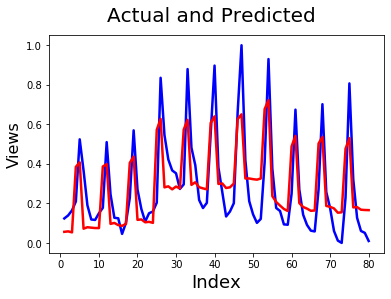

In [76]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

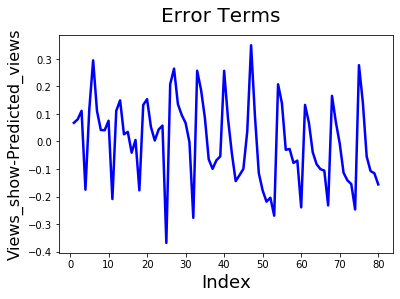

In [77]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

 Ad Impressions and Character A as the driver variables that could explain the
viewership pattern. Based on industry experience, ad impressions are directly proportional to the
marketing budget. Thus, by increasing the marketing budget, a better viewership could be
achieved. Similarly, Character A’s absence and presence created a significant change in show viewership.
Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to
improve show viewership.